<a href="https://colab.research.google.com/github/talesoverfables/SafeNav/blob/main/%20Models/streets_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os #Importing the operating system
import numpy as np #Linear Algebra
import pandas as pd #Data frames
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix

from sklearn import tree

In [ ]:
df = pd.read_csv('streets2.csv') #To read a .csv file into a dataframe using pandas

# Read and Analyse Data

In [ ]:
df.head()

,Street name,Nearest metro station distance (in km),Type of road,No. of Crime,Nearest police chowki (in km),Population Density,Rape,Kidnapping & Abduction_Total,Acid attack,Assault on Women,Sexual Harassment,Use of criminal force to women,Stalking,Other Assault on Women,District,Safety
0,akbar road,1.20,major district road,857.0,2.500,582320.0,91.0,305.0,212.0,54.0,9.0,26.0,123.0,37.0,central,3
1,aruna asaf ali marg,5.10,district road,2005.0,17.400,2292958.0,234.0,719.0,494.0,86.0,57.0,99.0,248.0,68.0,south west,2
2,ashram chowk,5.70,major district road,2008.0,2.700,2292958.0,266.0,683.0,469.0,85.0,34.0,74.0,274.0,123.0,south west,1
3,bahadur shah zafar marg,0.27,major district road,857.0,2.600,582320.0,91.0,305.0,212.0,54.0,9.0,26.0,123.0,37.0,central,3
4,barakhamba road,2.40,major district road,857.0,0.393,582320.0,91.0,305.0,212.0,54.0,9.0,26.0,123.0,37.0,central,3


In [ ]:
df.describe()
#Describes statistical values and details of the given dataset

,Nearest metro station distance (in km),No. of Crime,Nearest police chowki (in km),Population Density,Rape,Kidnapping & Abduction_Total,Acid attack,Assault on Women,Sexual Harassment,Use of criminal force to women,Stalking,Other Assault on Women,Safety
count,140.000000,130.000000,140.000000,1.390000e+02,130.000000,130.000000,130.000000,130.000000,130.000000,109.000000,130.000000,131.000000,140.000000
mean,21.652979,1539.053846,28.817171,1.544044e+06,166.984615,502.646154,361.384615,86.338462,28.469231,48.541284,204.284615,147.114504,1.800000
std,101.214698,762.117952,118.932993,1.031461e+06,82.936511,219.492292,162.497866,40.551729,21.507954,31.450588,104.660117,227.823165,1.188676
min,0.044000,193.000000,0.044000,1.160000e+05,20.000000,44.000000,56.000000,25.000000,1.000000,14.000000,15.000000,0.000000,0.000000
25%,0.650750,857.000000,0.700000,5.823200e+05,91.000000,305.000000,212.000000,54.000000,9.000000,26.000000,123.000000,37.000000,1.000000
50%,1.300000,1270.500000,1.600000,1.674714e+06,128.000000,466.000000,308.000000,69.500000,17.500000,26.000000,133.000000,37.000000,2.000000
75%,3.200000,2005.000000,4.800000,2.543243e+06,234.000000,719.000000,494.000000,130.000000,57.000000,91.000000,248.000000,68.000000,3.000000
max,600.000000,2762.000000,600.000000,3.656539e+06,280.000000,1047.000000,595.000000,171.000000,64.000000,99.000000,406.000000,665.000000,3.000000


In [ ]:
df.info()
#Describes the non-null values and the data-types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Street name                             140 non-null    object 
 1   Nearest metro station distance (in km)  140 non-null    float64
 2   Type of road                            140 non-null    object 
 3   No. of Crime                            130 non-null    float64
 4   Nearest police chowki (in km)           140 non-null    float64
 5   Population Density                      139 non-null    float64
 6   Rape                                    130 non-null    float64
 7   Kidnapping & Abduction_Total            130 non-null    float64
 8   Acid attack                             130 non-null    float64
 9   Assault on Women                        130 non-null    float64
 10  Sexual Harassment                       130 non-null    float6

# Dependent Variable Analysis

In [ ]:
d = pd.DataFrame(df['Safety'].value_counts())
fig = px.pie(d, values='Safety', names = ['Areas in safety level - 0', 'Areas in safety level - 1', 'Areas in safety level - 2', 'Areas in safety level-3'], hole = 0.5, opacity = 0.8, labels = {"Label":"Potability","Potability":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart of Safety Feature"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

# Correlation between Features

In [ ]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Nearest metro station distance (in km),No. of Crime,Nearest police chowki (in km),Population Density,Rape,Kidnapping & Abduction_Total,Acid attack,Assault on Women,Sexual Harassment,Use of criminal force to women,Stalking,Other Assault on Women,Safety
Nearest metro station distance (in km),1.000000,0.180653,0.882370,0.163385,0.192133,0.167571,0.197691,0.096145,0.207833,0.273354,0.174106,0.092562,-0.173044
No. of Crime,0.180653,1.000000,0.170019,0.909085,0.985978,0.853862,0.992782,0.918119,0.815432,0.880619,0.958863,0.749947,-0.759187
Nearest police chowki (in km),0.882370,0.170019,1.000000,0.144647,0.173277,0.140104,0.179138,0.106963,0.166463,0.219883,0.170502,0.116338,-0.091116
Population Density,0.163385,0.909085,0.144647,1.000000,0.904090,0.886640,0.924429,0.833611,0.809360,0.793763,0.829754,0.545539,-0.706502
Rape,0.192133,0.985978,0.173277,0.904090,1.000000,0.901758,0.994001,0.885382,0.888412,0.891025,0.912872,0.651473,-0.743278
Kidnapping & Abduction_Total,0.167571,0.853862,0.140104,0.886640,0.901758,1.000000,0.887315,0.792620,0.938919,0.810125,0.687101,0.306258,-0.647895
Acid attack,0.197691,0.992782,0.179138,0.924429,0.994001,0.887315,1.000000,0.882539,0.865775,0.916661,0.935609,0.681195,-0.760972
Assault on Women,0.096145,0.918119,0.106963,0.833611,0.885382,0.792620,0.882539,1.000000,0.667311,0.559767,0.844167,0.728832,-0.647888
Sexual Harassment,0.207833,0.815432,0.166463,0.809360,0.888412,0.938919,0.865775,0.667311,1.000000,0.879130,0.662856,0.272515,-0.664310
Use of criminal force to women,0.273354,0.880619,0.219883,0.793763,0.891025,0.810125,0.916661,0.559767,0.879130,1.000000,0.905012,0.845030,-0.648639


<ipython-input-18-4c24e9d824ec>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



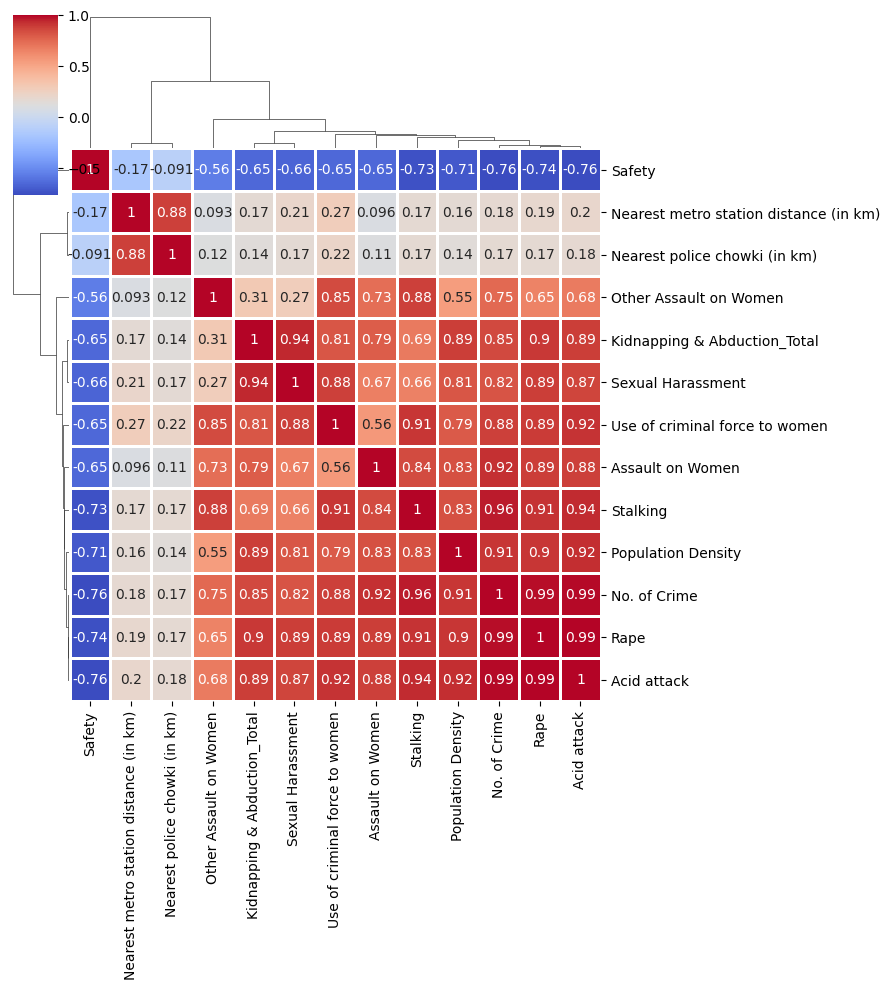

In [ ]:
sns.clustermap(df.corr(), cmap = "coolwarm", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9, 10))
plt.show()  #Displays the clustermap using Matplotlib

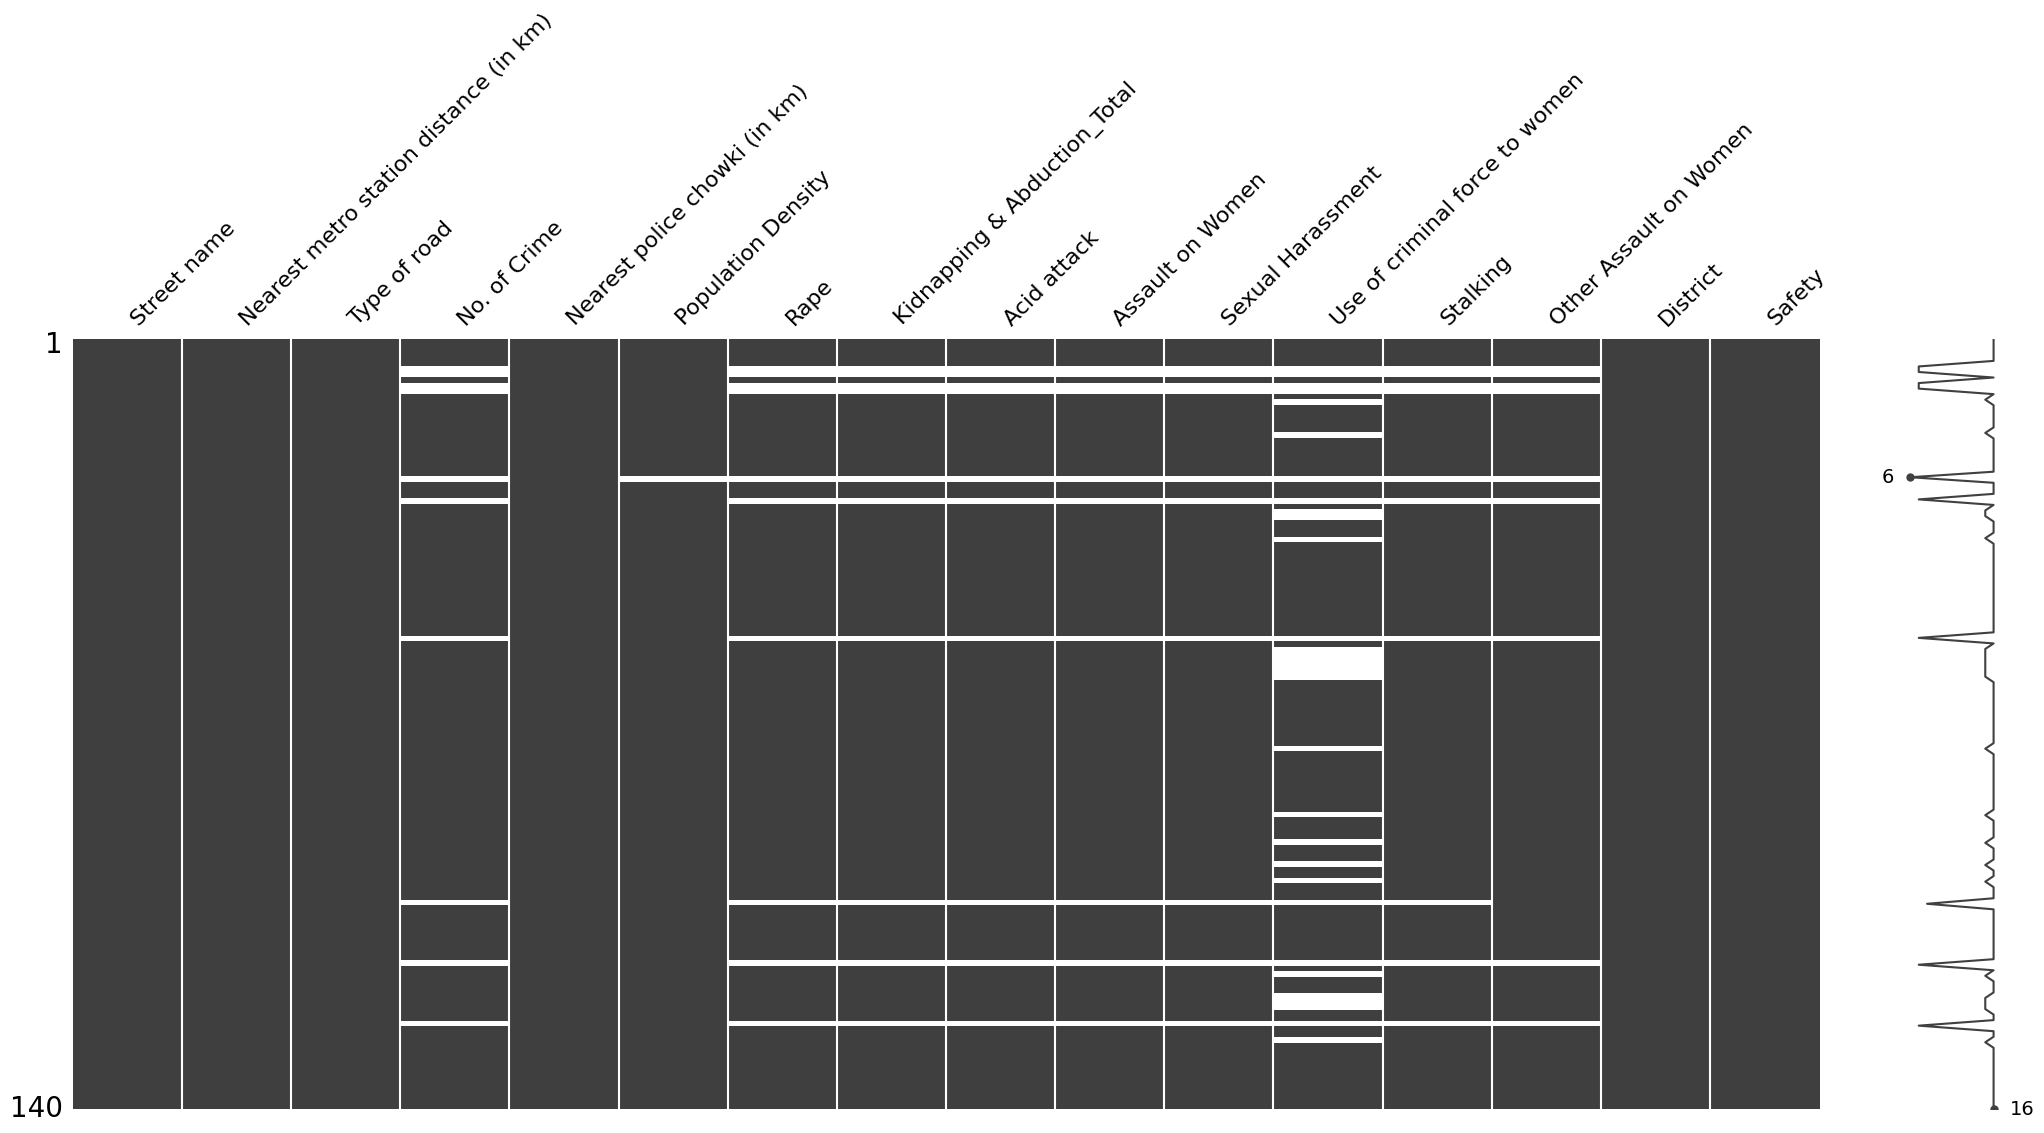

In [ ]:
msno.matrix(df)
plt.show()

In [ ]:
df.isnull().sum()

Street name                                0
Nearest metro station distance (in km)     0
Type of road                               0
No. of Crime                              10
Nearest police chowki (in km)              0
Population Density                         1
Rape                                      10
Kidnapping & Abduction_Total              10
Acid attack                               10
Assault on Women                          10
Sexual Harassment                         10
Use of criminal force to women            31
Stalking                                  10
Other Assault on Women                     9
District                                   0
Safety                                     0
dtype: int64

In [ ]:
df['No. of Crime'].fillna(value = df['No. of Crime'].mean(), inplace = True)
df['Rape'].fillna(value = df['Rape'].mean(), inplace = True)
df['Population Density'].fillna(value = df['Population Density'].mean(), inplace = True)
df['Kidnapping & Abduction_Total'].fillna(value = df['Kidnapping & Abduction_Total'].mean(), inplace = True)
df['Acid attack'].fillna(value = df['Acid attack'].mean(), inplace = True)
df['Assault on Women'].fillna(value = df['Assault on Women'].mean(), inplace = True)
df['Sexual Harassment'].fillna(value = df['Sexual Harassment'].mean(), inplace = True)
df['Use of criminal force to women'].fillna(value = df['Use of criminal force to women'].mean(), inplace = True)
df['Stalking'].fillna(value = df['Stalking'].mean(), inplace = True)
df['Other Assault on Women'].fillna(value = df['Other Assault on Women'].mean(), inplace = True)



In [ ]:
df.isnull().sum()

Street name                               0
Nearest metro station distance (in km)    0
Type of road                              0
No. of Crime                              0
Nearest police chowki (in km)             0
Population Density                        0
Rape                                      0
Kidnapping & Abduction_Total              0
Acid attack                               0
Assault on Women                          0
Sexual Harassment                         0
Use of criminal force to women            0
Stalking                                  0
Other Assault on Women                    0
District                                  0
Safety                                    0
dtype: int64

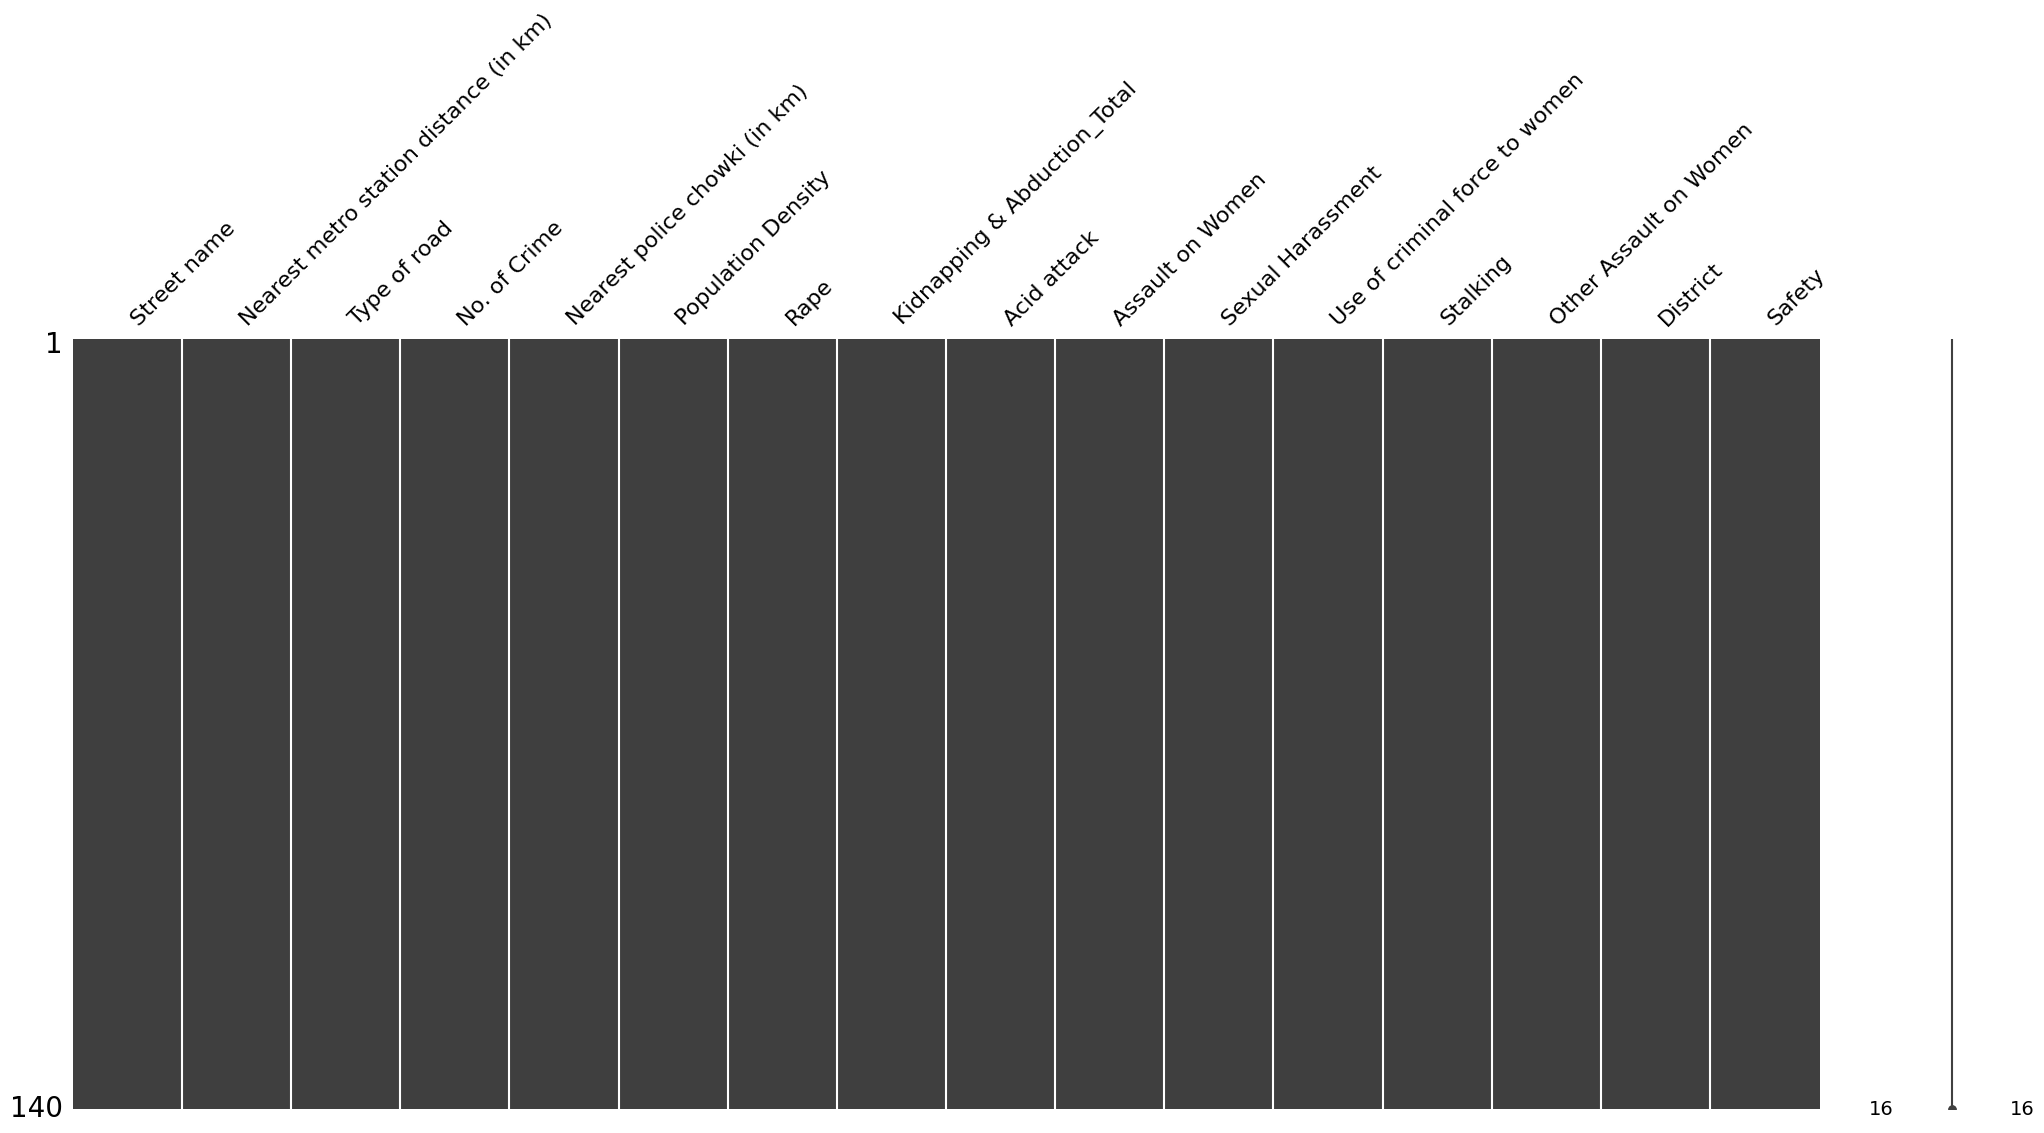

In [ ]:
msno.matrix(df)
plt.show()

# Modelling: Decision Tree and Random Forest Classifiers

In [ ]:
models = [('DTC', DecisionTreeClassifier(max_depth=3)),
          ('RF', RandomForestClassifier())]

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)
print(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

[['akbar road' 1.2 'major district road' ... 123.0 37.0 'central']
 ['aruna asaf ali marg' 5.1 'district road' ... 248.0 68.0 'south west']
 ['ashram chowk' 5.7 'major district road' ... 274.0 123.0 'south west']
 ...
 ['ashoka road' 3.2 'major district road' ... 123.0 37.0 'central']
 ['sree vinayaka mandir marg' 0.6 'major district road' ... 248.0 68.0
  'south west']
 ['kautilya marg' 2.8 'major district road' ... 248.0 68.0 'south west']]
[3 2 1 3 3 3 1 3 3 1 3 0 0 3 3 3 3 0 1 3 3 3 1 3 3 3 3 3 3 2 3 3 2 0 0 0 0
 3 3 3 1 0 1 1 1 3 2 1 1 1 1 1 1 1 2 3 0 0 0 0 0 0 3 3 3 3 3 1 3 3 3 3 3 3
 0 3 3 1 1 2 1 1 3 1 3 3 0 3 3 3 3 0 1 1 1 0 1 3 0 3 1 3 1 3 0 3 3 1 1 1 1
 3 3 1 1 2 1 2 2 0 0 0 1 3 1 1 3 0 3 3 1 1 2 3 3 1 3 3 1 1]


ValueError: could not convert string to float: 'chlemsford road'